In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [30]:
# Load the data

from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 60000장 28x28 픽셀의 흑백 이미지
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [31]:
pd.Series(y_train).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

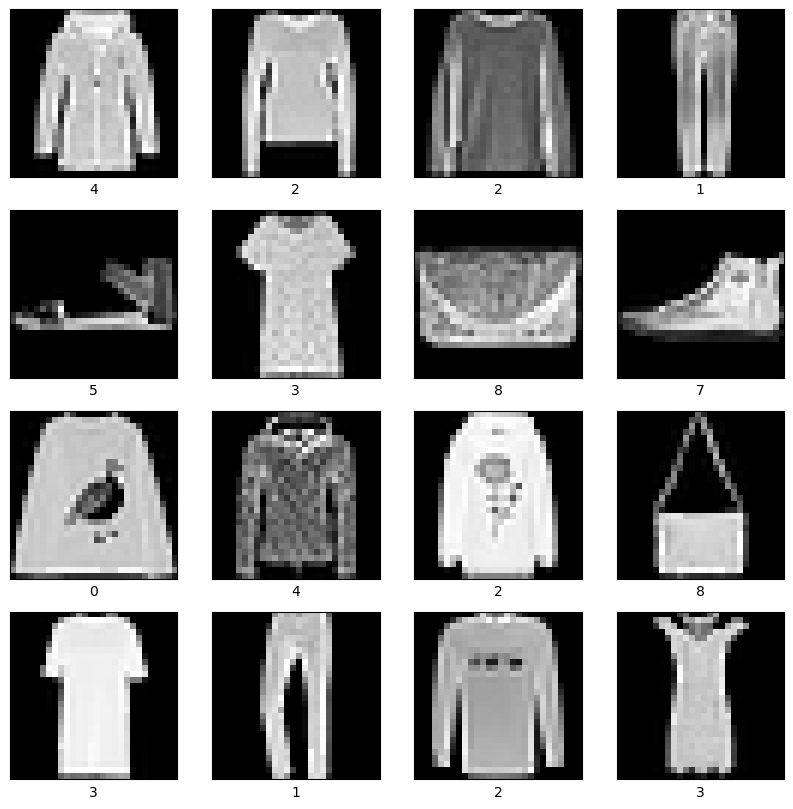

In [32]:
samples = np.random.randint(60000, size=16)
plt.figure(figsize=(10,10))

for i, idx in enumerate(samples):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap='gray')
    plt.xlabel(y_train[idx])

In [33]:
# train, valid set 분리

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,)


In [34]:
# 데이터 전처리

X_train:np.ndarray = X_train.astype(np.float32) / 255.
X_valid:np.ndarray = X_valid.astype(np.float32) / 255.
X_test:np.ndarray = X_test.astype(np.float32) / 255.


print(X_train.max(), X_train.min())
print(X_train)

1.0 0.0
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [35]:
# flatten

X_train = X_train.reshape(-1, 28*28)
X_valid = X_valid.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

print(X_train.shape, X_valid.shape, X_test.shape)

(48000, 784) (12000, 784) (10000, 784)


In [36]:
# label one-hot encoding

from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_valid_o = to_categorical(y_valid)
y_test_o = to_categorical(y_test)

print(y_train_o.shape, y_valid_o.shape, y_test_o.shape)

(48000, 10) (12000, 10) (10000, 10)


In [37]:
# 모델 구성

from keras import layers

model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(784,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     


                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

EPOCHS = 30
BATCH_SIZE = 128

history = model.fit(X_train, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid_o), verbose=1)

Epoch 1/30
375/375 [==============================] - 1s 1ms/step - loss: 0.6425 - accuracy: 0.7802 - val_loss: 0.4903 - val_accuracy: 0.8276
Epoch 2/30
375/375 [==============================] - 0s 983us/step - loss: 0.4283 - accuracy: 0.8493 - val_loss: 0.4298 - val_accuracy: 0.8457
Epoch 3/30
375/375 [==============================] - 0s 954us/step - loss: 0.3876 - accuracy: 0.8624 - val_loss: 0.3920 - val_accuracy: 0.8575
Epoch 4/30
375/375 [==============================] - 0s 918us/step - loss: 0.3631 - accuracy: 0.8702 - val_loss: 0.3994 - val_accuracy: 0.8564
Epoch 5/30
375/375 [==============================] - 0s 957us/step - loss: 0.3425 - accuracy: 0.8777 - val_loss: 0.3748 - val_accuracy: 0.8687
Epoch 6/30
375/375 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8817 - val_loss: 0.3492 - val_accuracy: 0.8761
Epoch 7/30
375/375 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8851 - val_loss: 0.3501 - val_accuracy: 0.877

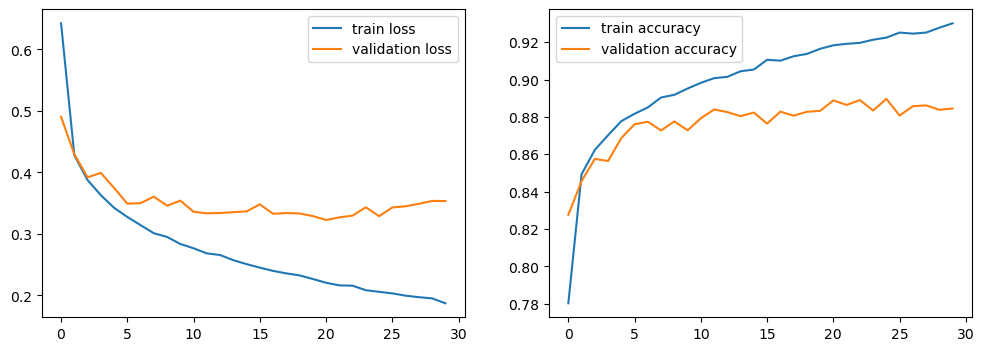

In [39]:
# 학습 과정 시각화

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='validation loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['accuracy'], label='train accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [40]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [43]:
## 모델 평가

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred, average='macro'))
print('recall:', recall_score(y_test, y_pred, average='macro'))
print('f1:', f1_score(y_test, y_pred, average='macro'))


313/313 [==============================] - 0s 383us/step
accuracy: 0.8774
precision: 0.8770572958492636
recall: 0.8774000000000001
f1: 0.8763633394996855


In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])